<a href="https://colab.research.google.com/github/PRihana/Machine-learning/blob/master/10_4_2020(ML)Adult_Data_Boosting_%26_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data =pd.read_csv("/content/adult.data.txt",names = ["age","workclass","fnlwgt","education","education_num",\
            'marital_status',"occupation","relationship","race","Gender","capital-gain","capital-loss","hours-per-week",\
                                             "native-country","income"])

data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


50K, <=50K. age: continuous. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. sex: Female, Male. capital-gain: continuous. capital-loss: continuous. hours-per-week: continuous. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [3]:
data.income.value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [4]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
Gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
data.corr()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [6]:
data.describe()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


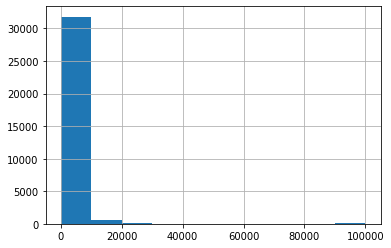

In [7]:
%matplotlib inline
data["capital-gain"].hist()

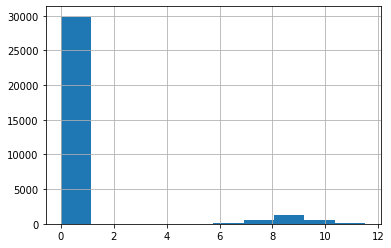

In [8]:
import numpy as np
np.log1p(data["capital-gain"]).hist()

In [9]:
(data['capital-gain']==0).sum()

29849

In [10]:
data.select_dtypes(exclude=object)

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [11]:
help(data.select_dtypes)

Help on method select_dtypes in module pandas.core.frame:

select_dtypes(include=None, exclude=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return a subset of the DataFrame's columns based on the column dtypes.
    
    Parameters
    ----------
    include, exclude : scalar or list-like
        A selection of dtypes or strings to be included/excluded. At least
        one of these parameters must be supplied.
    
    Returns
    -------
    DataFrame
        The subset of the frame including the dtypes in ``include`` and
        excluding the dtypes in ``exclude``.
    
    Raises
    ------
    ValueError
        * If both of ``include`` and ``exclude`` are empty
        * If ``include`` and ``exclude`` have overlapping elements
        * If any kind of string dtype is passed in.
    
    Notes
    -----
    * To select all *numeric* types, use ``np.number`` or ``'number'``
    * To select strings you must use the ``object`` dtype, but note that
      this

In [0]:
numerical_data = data.select_dtypes(exclude=object)

In [13]:
data.income

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [14]:
data.income[0]

' <=50K'

In [15]:
data.income[32560]

' >50K'

In [16]:
y_apply = data.income.apply(lambda x:1 if x==' >50K' else 0)
y_apply

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data.income)
y

array([0, 0, 0, ..., 0, 0, 1])

In [0]:
x = numerical_data.copy()

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=56)

In [20]:
from sklearn.svm import LinearSVC
LS = LinearSVC()
LS.fit(x_train,y_train)
y_pred = LS.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
from sklearn.metrics import f1_score
f1_score(y_pred,y_test)

0.26806833114323253

In [22]:
from sklearn.svm import SVC
LS = SVC(kernel="rbf")
LS.fit(x_train,y_train)
y_pred = LS.predict(x_test)
f1_score(y_pred,y_test)

0.25985663082437277

In [23]:
x.dtypes

age               int64
fnlwgt            int64
education_num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

In [24]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
f1_score(y_pred,y_test)

0.4170482564283199

In [25]:
from sklearn.naive_bayes import GaussianNB
GB = GaussianNB()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
f1_score(y_pred,y_test)

0.4170482564283199

In [26]:
from sklearn.naive_bayes import BernoulliNB
GB = BernoulliNB()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
f1_score(y_pred,y_test)

0.31631863882443934

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_pred = ABC.predict(x_test)
f1_score(y_pred,y_test)

0.5641357027463652

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5))
ABC.fit(x_train,y_train)
y_pred = ABC.predict(x_test)
f1_score(y_pred,y_test)

0.5598086124401914

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = GradientBoostingClassifier()
ABC.fit(x_train,y_train)
y_pred = ABC.predict(x_test)
f1_score(y_pred,y_test)

0.5696533682145193

In [30]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is induced.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'deviance', 'exponential'}, optional (default='deviance')
 |      loss function to be optimized. 'deviance' refers to
 |      deviance (= logistic regression) for classification
 |      with probabilistic outputs. For loss 'exponential' gradient
 |      boosting recovers the AdaBoost algorithm.
 |  

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
ABC = GradientBoostingClassifier(subsample=0.5)
ABC.fit(x_train,y_train)
y_pred = ABC.predict(x_test)
f1_score(y_pred,y_test)

0.5751928020565552